In [174]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


In [202]:
df_train= pd.read_csv("../Data/train.csv")
df_test= pd.read_csv("../Data/test.csv")

In [176]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10966 entries, 0 to 10965
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionNumber    10966 non-null  int64  
 1   UserID               10966 non-null  int64  
 2   Age                  10966 non-null  int64  
 3   Gender               10966 non-null  object 
 4   Occupation           10966 non-null  object 
 5   EducationLevel       10966 non-null  object 
 6   MaritalStatus        10966 non-null  object 
 7   NumDependents        10966 non-null  int64  
 8   Income               10966 non-null  object 
 9   Expenditure          10966 non-null  object 
 10  GiftsTransaction     10966 non-null  object 
 11  TransactionDate      10966 non-null  object 
 12  TransactionTime      10966 non-null  object 
 13  TransactionAmount    10966 non-null  object 
 14  MerchantID           10966 non-null  object 
 15  TransactionType      10966 non-null 

In [177]:
df_train.columns

Index(['TransactionNumber', 'UserID', 'Age', 'Gender', 'Occupation',
       'EducationLevel', 'MaritalStatus', 'NumDependents', 'Income',
       'Expenditure', 'GiftsTransaction', 'TransactionDate', 'TransactionTime',
       'TransactionAmount', 'MerchantID', 'TransactionType',
       'TransactionLocation', 'DeviceType', 'Latitude', 'Longitude',
       'EmailDomain', 'Terrorism', 'UserTenure', 'IsFraud'],
      dtype='object')

## Data Analysis

#### Checking labels distribution

<Axes: ylabel='count'>

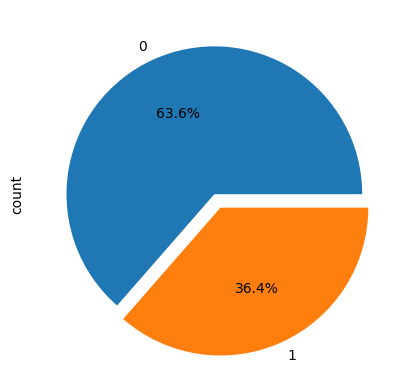

In [178]:
df_train['IsFraud'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

36.4% Fraud and 63.6% not Fraud.

#### Checking amount unit

In [179]:
#df_train['transaction_units'] = df_train['TransactionAmount'].str.extract(r'([^\d\s.]+)')
#df_train['income_units'] = df_train['Income'].str.extract(r'([^\d\s.]+)')
#df_train['expend_units'] = df_train['Expenditure'].str.extract(r'([^\d\s.]+)')
#print(df_train['transaction_units'].unique())
#print(df_train['income_units'].unique())
#print(df_train['expend_units'].unique())

#### Checking gender type

In [180]:
print(df_train['Gender'].unique())
print(df_test['Gender'].unique())

['Female' 'Male' 'he' 'isnotfemale' 'fem' 'she' 'man' 'woman' 'isnotmale']
['man' 'Male' 'Female' 'he' 'fem' 'isnotfemale' 'she' 'isnotmale' 'woman']


In [181]:
def unify_gender(gender):
    if gender in ['Female', 'fem', 'she', 'woman']:
        return 'F'
    elif gender in ['Male', 'he', 'man']:
        return 'M'
    elif gender in ['isnotfemale', 'isnotmale']:
        return 'O'
    else:
        return 'unknown'

df_train['Gender'] = df_train['Gender'].apply(unify_gender)

print(df_train['Gender'].unique())

['F' 'M' 'O']


In [182]:
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])
df_train['Gender'].unique()

array([0, 1, 2])

In [183]:
df_test['Gender'] = df_test['Gender'].apply(unify_gender)
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])
df_test.Gender.unique()

array([1, 0, 2])

#### Checking age

In [203]:
df_train.Age.value_counts()

Age
 18       512
 32       412
 39       398
 36       378
 33       369
         ... 
 67000      1
-66         1
-58         1
 66000      1
-60         1
Name: count, Length: 142, dtype: int64

In [184]:
df_train.loc[(df_train['Age'] < 0) | (df_train['Age'] > 100), 'Age'] = -1
df_train['Age'].value_counts()

Age
-1     1744
 18     512
 32     412
 39     398
 36     378
 33     369
 40     367
 34     361
 35     361
 31     360
 30     315
 37     315
 28     293
 38     291
 27     288
 26     267
 42     266
 43     245
 41     245
 29     241
 44     234
 24     232
 25     214
 21     211
 23     199
 47     186
 45     179
 46     178
 48     165
 49     146
 22     137
 50     136
 20     133
 19     103
 51      86
 54      63
 52      62
 53      59
 55      53
 57      29
 60      24
 61      22
 56      18
 59      16
 58      15
 62      13
 66       9
 68       8
 63       6
 64       2
Name: count, dtype: int64

In [201]:
df_test.loc[(df_test['Age'] < 0) | (df_test['Age'] > 100), 'Age'] = -1
df_test['Age'].value_counts()

Age
-1     1187
 18     381
 32     276
 36     250
 40     245
 39     242
 31     240
 37     227
 34     225
 38     225
 33     221
 30     219
 28     201
 35     200
 27     192
 42     191
 41     190
 26     181
 24     172
 29     169
 43     157
 25     138
 21     135
 47     126
 44     124
 23     122
 45     115
 22     112
 46     111
 48     108
 49      90
 20      85
 50      75
 19      72
 51      63
 54      38
 52      36
 53      33
 55      26
 57      23
 56      21
 60      19
 58      10
 59       9
 66       9
 62       8
 63       5
 61       4
 67       2
 68       1
 64       1
Name: count, dtype: int64

#### Handling Terrorism

In [185]:
df_train['Terrorism'] = df_train['Terrorism'].astype(int)

#### Handling TransactionType

In [186]:
df_train['TransactionType'].unique()

array(['Withdrawal', 'Purchase', 'Payment', 'Transfer'], dtype=object)

In [187]:
df_train['TransactionType'] = label_encoder.fit_transform(df_train['TransactionType'])
df_train['TransactionType'].unique()

array([3, 1, 0, 2])

#### Handling TransactionLocation

In [188]:
df_train['TransactionLocation'].unique()

array(['Adelaide', 'Canberra', 'Brisbane', 'Darwin', 'MLB', 'Mel',
       'Sydney', 'Hobart', 'HBT', 'Melb', 'Perth', 'Melbourne',
       'canberra', 'brisbane', 'melbourne', 'Bne', 'perth', 'DRW',
       'Melburn', 'hobart', 'darwin', 'Adelaide City', 'Adl', 'CBR',
       'PTH', 'Cbr', 'Drw', 'sydney', 'BNE', 'Pth', 'SYD', 'Hbt', 'adl',
       'Syd'], dtype=object)

In [189]:
def unify_location(location):
    if location in ['Adelaide', 'Adelaide City', 'Adl', 'adl']:
        return 'ADL'
    elif location in ['Canberra', 'canberra', 'CBR' ,'Cbr']:
        return 'CBR'
    elif location in ['Brisbane', 'brisbane', 'Bne', 'BNE']:
        return 'BNE'
    elif location in ['Darwin', 'DRW', 'darwin', 'Drw']:
        return 'DRW'
    elif location in ['MLB', 'Mel', 'Melb', 'Melbourne', 'melbourne', 'Melburn']:
        return 'MLB'
    elif location in ['Sydney', 'sydney', 'SYD', 'Syd']:
        return 'SYD'
    elif location in ['Hobart', 'HBT', 'hobart', 'Hbt']:
        return 'HBT'
    elif location in ['Perth', 'perth', 'PTH', 'Pth']:
        return 'PTH'
    else:
        return 'unknown'

df_train['TransactionLocation'] = df_train['TransactionLocation'].apply(unify_location)
df_train['TransactionLocation'].unique()

array(['ADL', 'CBR', 'BNE', 'DRW', 'MLB', 'SYD', 'HBT', 'PTH'],
      dtype=object)

In [190]:
df_train['TransactionLocation'] = label_encoder.fit_transform(df_train['TransactionLocation'])
df_train['TransactionLocation'].unique()

array([0, 2, 1, 3, 5, 7, 4, 6])

#### Education level

In [191]:
df_train['EducationLevel'].unique()

array(['Bachelor', 'High School', 'Master', 'PhD'], dtype=object)

In [192]:
education_order = ['High School', 'Bachelor', 'Master', 'PhD']
df_train['EducationLevel'] = pd.Categorical(df_train['EducationLevel'], categories= education_order, ordered=True)
df_train['EducationLevel'] = df_train['EducationLevel'].cat.codes
df_train['EducationLevel'].unique()

array([1, 0, 2, 3], dtype=int8)

#### Occupation

In [193]:
df_train['Occupation'].unique()

array(['Professional', 'Student', 'Unemployed', 'Retired'], dtype=object)

In [194]:
occupation_order = ['Student', 'Unemployed', 'Professional', 'Retired']
df_train['Occupation'] = pd.Categorical(df_train['Occupation'], categories= occupation_order, ordered=True)
df_train['Occupation'] = df_train['Occupation'].cat.codes
df_train['Occupation'].unique()

array([2, 0, 1, 3], dtype=int8)

#### Marital Status

In [195]:
df_train['MaritalStatus'].unique()

array(['Widowed', 'Married', 'Single', 'Divorced'], dtype=object)

In [196]:
marital_order = ['Single', 'Married', 'Divorced', 'Widowed']
df_train['MaritalStatus'] = pd.Categorical(df_train['MaritalStatus'], categories= marital_order, ordered=True)
df_train['MaritalStatus'] = df_train['MaritalStatus'].cat.codes
df_train['MaritalStatus'].unique()

array([3, 1, 0, 2], dtype=int8)

#### Device type

In [197]:
df_train['DeviceType'].unique()

array(['Mobile', 'iphone 15', 'Tablet', 'Desktop', 'android',
       'smartphone', 'mob', 'galaxys7'], dtype=object)

In [198]:
df_train.DeviceType = df_train.DeviceType.map({'Mobile': 'mobile', 'Desktop': 'computer', 'Tablet': 'tablet', 
                      'galaxys7': 'mobile', 'iphone 15': 'mobile', 'android': 'mobile',
                     'smartphone': 'mobile', 'mob': 'mobile'})

df_train.DeviceType.isnull().sum()

0

In [199]:
df_train.DeviceType = df_train.DeviceType.map({'mobile': 0, 'computer': 1, 'tablet': 2})
df_train.DeviceType.unique()

array([0, 2, 1])

#### Drop not important features

In [200]:
df_train.drop(['TransactionDate','TransactionTime','MerchantID','EmailDomain'],axis=1,inplace=True)

## Modeling